In [24]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

from agent import EpsilonGreedyAgent, UCBAgent
from monitor import AgentMonitor

pd.options.display.float_format = "{:,.2f}".format

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
np.random.seed(234728375)

# env parameters
steps = 1000
runs = 200
monitors = []

# agent parameters
init_q = 0
step_sizes = [0.01, 0.1, 0.5, 1.0, None]
epsilon = 0.1
nA = 10

# group truth init point
_truth = np.random.normal(loc=0, scale=1, size=nA)
for step_size in tqdm(step_sizes):
    # agent = EpsilonGreedyAgent(num_actions=nA, epsilon=epsilon, init_q=init_q, step_size=step_size)
    agent = UCBAgent(num_actions=nA, bound_c=2, init_q=init_q, step_size=step_size)
    monitor = AgentMonitor(agent, runs, steps)
    
    for run in tqdm(range(runs)):
        # init
        truth = _truth.copy()  # each round start with same starting point
        agent.reset()
        a = agent.get_action()
        for step in range(steps):
            r = np.random.normal(truth[a], scale=1)
            a = agent.agent_step(reward=r, observation=None)
            monitor.record(run, a, r, truth)

            # nonstatoinary truth
            truth += np.random.normal(0,0.1,size=nA)
    
    monitors.append(monitor)

100%|██████████| 5/5 [01:10<00:00, 14.01s/it]


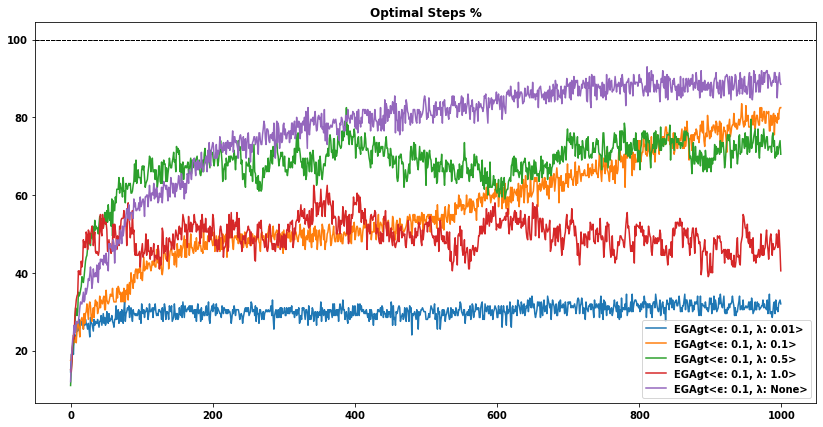

In [17]:
# print(monitor.get_summary())
plt.figure(figsize=(14,7))
for monitor in monitors:
    # monitor.plot_avg_rewards_trace()
    monitor.plot_optimal_action_trace()

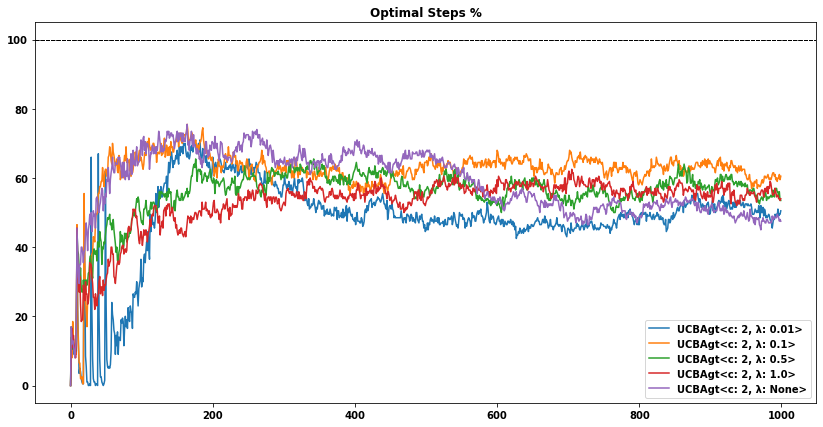

In [59]:
# print(monitor.get_summary())
plt.figure(figsize=(14,7))
for monitor in monitors:
    # monitor.plot_avg_rewards_trace()
    monitor.plot_optimal_action_trace()